In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn
import statsmodels.formula.api as smf


from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## PREGUNTAS 
* **¿Que ciudad tiene mas minutos en llamadas de dia y de noche?**
    * En los dos casos es Virginia Occidental
    * En la Fila 207 se encuentran La Cantidad de usuarios por estados.
    
    
* **¿Cual es la persona o usario con mas minutos en llamadas tanto de dia como de noche?**
    * El usuario con mas minutos en llamada de dia es el usuario ubicado en la fila **156, numero cel: 370-9116 - Ohio (OH)**
    * El usuario con mas minutos en llamada de noche es el usuario ubicado en la fila **244, numero cel: 335-1697 - Virginia (VA)**
    
    
* **¿Cuales son las persona con menos minutos en llamadas tanto de dia como de noche?.**
    * EN LA FILA 196 y 197 SE ENCUENTRAN LOS USUARIOS CON MENOS MINUTOS, TANTO DE DIA COMO DE NOCHE.


* **¿Cuantas personas tienen el plan internacional y cuantas no?.**
    * 3010 Usuarios **NO** tienen el plan Internacional
    * 323 Usuarios **SI** tiene el plan Internacional
    
    
* **¿Que porcentaje hay que una persona llame mas de dia o de noche?.**
    * La media de llamadas tanto de dia como de noche son similares. **Alrededor de 100 llamadas,tanto de dia como de noche. Son 12 llamadas para arriba y para abajo, es decir entre 88 y 112**.
    
    
* **¿Que porcentaje de llamada tenemos tanto de dia como de noche?.**
    * La media de llamada de dia es de 179'
    * La media de llamadas de Noche es de 200'


* **Los clientes que abandonaron la compañia.(LA INFORMACION SE ENCUENTRA EN LA FILA 224)**
    * **Abandonaron** la compañia 483 Usuarios
    * **No abandonaron** la compañia 2850 Usuarios

In [222]:
data = pd.read_csv("../MisTrabajos/Datasets/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [191]:
data.shape , data.columns

((3333, 21),
 Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
        'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
        'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
        'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
        'CustServ Calls', 'Churn?'],
       dtype='object'))

In [199]:
subset.isnull().sum()

State             0
Int'l Plan        0
Account Length    0
Phone             0
Day Calls         0
Night Calls       0
DayMins           0
NightMins         0
Day Charge        0
Night Charge      0
Churn?            0
dtype: int64

In [192]:
subset = data[["State","Int'l Plan","Account Length","Phone","Day Calls","Night Calls","Day Mins","Night Mins",
               "Day Charge",'Night Charge',"Churn?"]]
subset.head()

,State,Int'l Plan,Account Length,Phone,Day Calls,Night Calls,Day Mins,Night Mins,Day Charge,Night Charge,Churn?
0,KS,no,128,382-4657,110,91,265.1,244.7,45.07,11.01,False.
1,OH,no,107,371-7191,123,103,161.6,254.4,27.47,11.45,False.
2,NJ,no,137,358-1921,114,104,243.4,162.6,41.38,7.32,False.
3,OH,yes,84,375-9999,71,89,299.4,196.9,50.90,8.86,False.
4,OK,yes,75,330-6626,113,121,166.7,186.9,28.34,8.41,False.


In [201]:
subset.describe()

,Account Length,Day Calls,Night Calls,DayMins,NightMins,Day Charge,Night Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,100.435644,100.107711,179.775098,200.872037,30.562307,9.039325
std,39.822106,20.069084,19.568609,54.467389,50.573847,9.259435,2.275873
min,1.000000,0.000000,33.000000,0.000000,23.200000,0.000000,1.040000
25%,74.000000,87.000000,87.000000,143.700000,167.000000,24.430000,7.520000
50%,101.000000,101.000000,100.000000,179.400000,201.200000,30.500000,9.050000
75%,127.000000,114.000000,113.000000,216.400000,235.300000,36.790000,10.590000
max,243.000000,165.000000,175.000000,350.800000,395.000000,59.640000,17.770000


In [193]:
subset = subset.rename(columns={"Day Mins":"DayMins"})
subset = subset.rename(columns={"Night Mins":"NightMins"})

subset.head()

,State,Int'l Plan,Account Length,Phone,Day Calls,Night Calls,DayMins,NightMins,Day Charge,Night Charge,Churn?
0,KS,no,128,382-4657,110,91,265.1,244.7,45.07,11.01,False.
1,OH,no,107,371-7191,123,103,161.6,254.4,27.47,11.45,False.
2,NJ,no,137,358-1921,114,104,243.4,162.6,41.38,7.32,False.
3,OH,yes,84,375-9999,71,89,299.4,196.9,50.90,8.86,False.
4,OK,yes,75,330-6626,113,121,166.7,186.9,28.34,8.41,False.


In [194]:
data1 = subset[(subset["DayMins"]>300)]
data1.head()

,State,Int'l Plan,Account Length,Phone,Day Calls,Night Calls,DayMins,NightMins,Day Charge,Night Charge,Churn?
15,NY,no,161,351-7269,67,128,332.9,160.6,56.59,7.23,True.
76,DC,no,82,374-5353,109,73,300.3,270.1,51.05,12.15,True.
156,OH,no,83,370-9116,120,114,337.4,153.9,57.36,6.93,True.
197,TX,no,208,378-3625,67,102,326.5,181.7,55.51,8.18,True.
230,MD,yes,93,360-3324,109,74,312.0,217.6,53.04,9.79,True.


* **Los Usuarios con mas de 300 Minutos en llamadas de Dia.**

In [195]:
data1 = subset[(subset["NightMins"]>300)]
data1.head()

,State,Int'l Plan,Account Length,Phone,Day Calls,Night Calls,DayMins,NightMins,Day Charge,Night Charge,Churn?
9,WV,yes,141,330-8173,84,97,258.6,326.4,43.96,14.69,False.
42,AR,no,34,353-7289,82,78,124.8,311.5,21.22,14.02,False.
85,VT,no,128,388-6441,104,78,179.3,323.0,30.48,14.54,False.
244,VA,no,108,335-1697,99,75,198.5,354.9,33.75,15.97,True.
289,OK,no,89,352-6976,95,89,303.9,312.1,51.66,14.04,True.


* **Los Usuarios con mas de 300 Minutos en llamadas de noche.**

In [196]:
data1 = subset[(subset["NightMins"]<50)]
data1.head()

,State,Int'l Plan,Account Length,Phone,Day Calls,Night Calls,DayMins,NightMins,Day Charge,Night Charge,Churn?
883,WY,no,42,357-7060,84,117,146.3,45.0,24.87,2.03,False.
1113,IA,no,152,387-6716,98,121,206.3,43.7,35.07,1.97,False.
1260,AK,no,76,366-9781,107,102,160.1,23.2,27.22,1.04,False.
3247,OK,no,146,377-4975,104,73,138.4,47.4,23.53,2.13,True.


* **Las personas con menos minutos en llamadas nocturnas.**


In [197]:
data1 = subset[(subset["DayMins"]<10)]
data1.head()

,State,Int'l Plan,Account Length,Phone,Day Calls,Night Calls,DayMins,NightMins,Day Charge,Night Charge,Churn?
1345,SD,no,98,392-2555,0,88,0.0,167.1,0.00,7.52,True.
1397,VT,no,101,413-7655,0,95,0.0,168.8,0.00,7.60,False.
1986,WI,no,70,405-9233,100,89,7.9,156.6,1.34,7.05,False.
2736,OK,no,127,403-1128,113,156,2.6,242.7,0.44,10.92,False.
2753,OH,no,134,406-4158,86,80,7.8,186.5,1.33,8.39,False.


* **Las personas con menos minutos en llamadas de Dia.**

In [198]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Int'l Plan      3333 non-null   object 
 2   Account Length  3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Day Calls       3333 non-null   int64  
 5   Night Calls     3333 non-null   int64  
 6   DayMins         3333 non-null   float64
 7   NightMins       3333 non-null   float64
 8   Day Charge      3333 non-null   float64
 9   Night Charge    3333 non-null   float64
 10  Churn?          3333 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 286.6+ KB


array([[<AxesSubplot:title={'center':'Account Length'}>,
        <AxesSubplot:title={'center':'Day Calls'}>,
        <AxesSubplot:title={'center':'Night Calls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'NightMins'}>,
        <AxesSubplot:title={'center':'Day Charge'}>],
       [<AxesSubplot:title={'center':'Night Charge'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

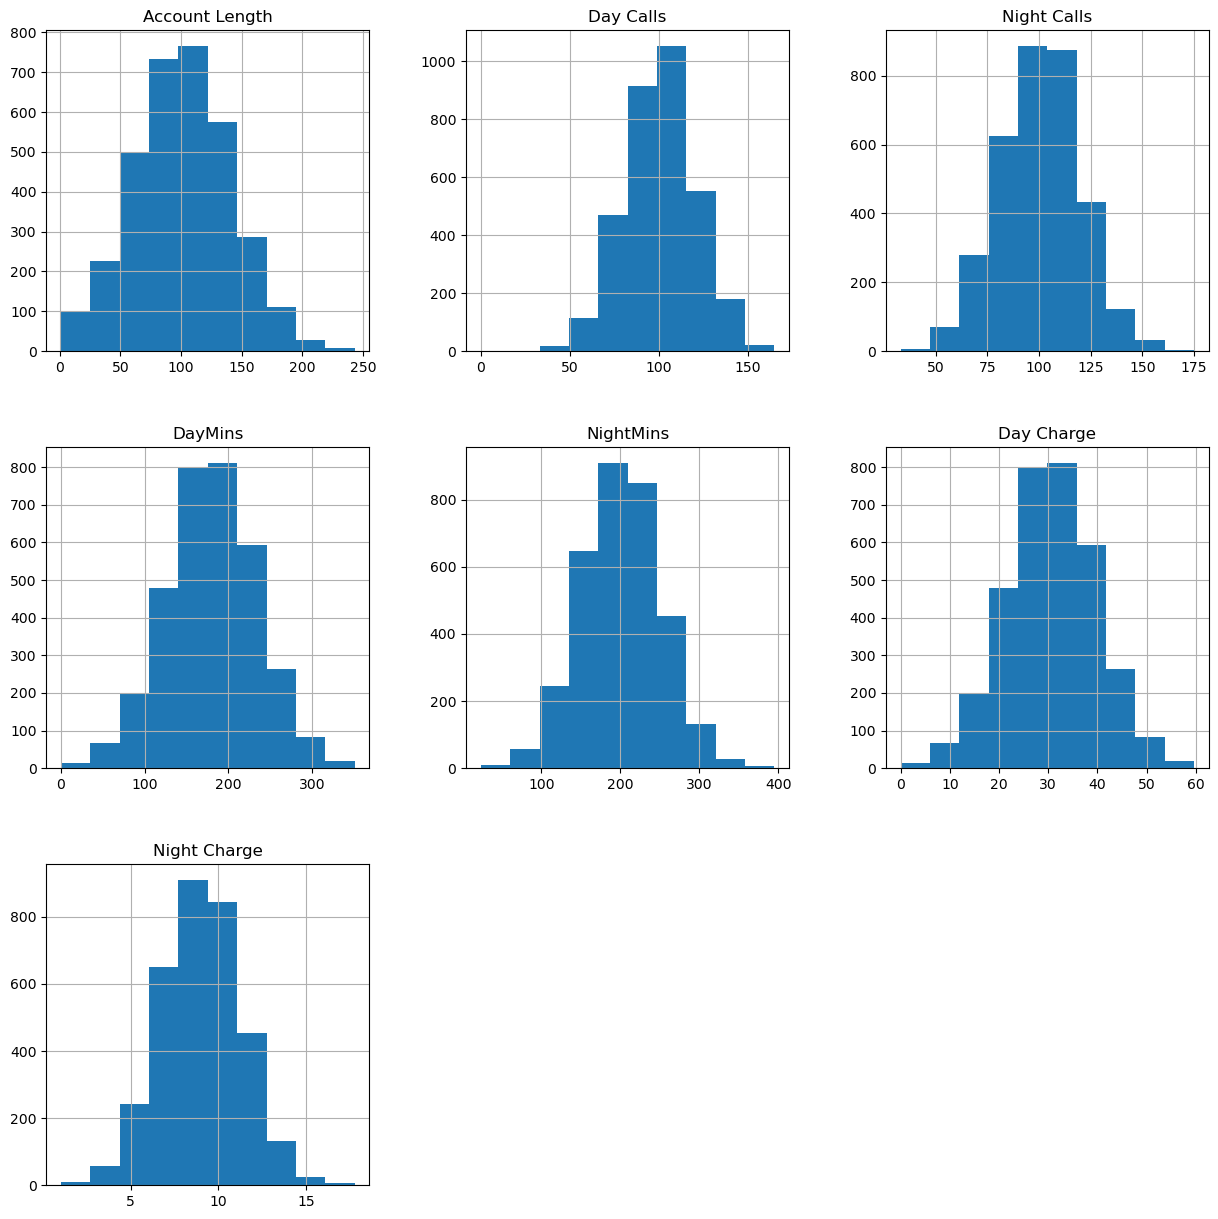

In [200]:
subset.hist(figsize=(15,15))

* Lo que se puede ver claramente es que todos los datos que tenemos llevan una distribucion normal 

In [202]:
subset.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_7904\1219836613.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  subset.corr()


,Account Length,Day Calls,Night Calls,DayMins,NightMins,Day Charge,Night Charge
Account Length,1.000000,0.038470,-0.013176,0.006216,-0.008955,0.006214,-0.008960
Day Calls,0.038470,1.000000,-0.019557,0.006750,0.022938,0.006753,0.022927
Night Calls,-0.013176,-0.019557,1.000000,0.022972,0.011204,0.022972,0.011188
DayMins,0.006216,0.006750,0.022972,1.000000,0.004323,1.000000,0.004300
NightMins,-0.008955,0.022938,0.011204,0.004323,1.000000,0.004324,0.999999
Day Charge,0.006214,0.006753,0.022972,1.000000,0.004324,1.000000,0.004301
Night Charge,-0.008960,0.022927,0.011188,0.004300,0.999999,0.004301,1.000000


* Los datos con mas correlaciones entre si son los minutos tanto de dia como de noche y su recargo (una correlacion perfecta)

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

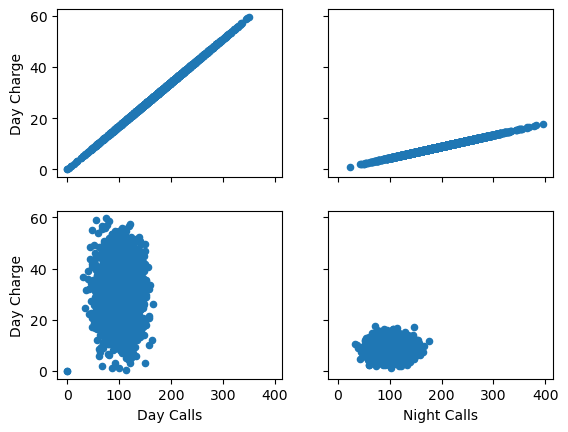

In [203]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)

data.plot(kind="scatter" , x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter" , x="Night Mins", y="Night Charge", ax=axs[0][1]) 
data.plot(kind="scatter" , x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter" , x="Night Calls", y="Night Charge", ax=axs[1][1])

* Comparamos las llamadas de dia como de noche. en que momentos se hacen mas y si tienen afinidad

* Podemos ver que se hacen mas llamadas de **DIA** que de **NOCHE**

In [204]:
dummy_churn = pd.get_dummies(subset["Churn?"], prefix="Churn?")
dummy_churn.head()

,Churn?_False.,Churn?_True.
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [224]:
dummy_churn.sum()

Churn?_False.    2850
Churn?_True.      483
dtype: int64

* **Churn?** = abandono de compañia
    * Abandonaron la compañia 483 Usuarios 
    * No abandonaron la compañia 2850 Usuarios

In [300]:
dummy_plan = pd.get_dummies(subset["Int'l Plan"], prefix="Intl Plan")
dummy_plan.head()

,Intl Plan_no,Intl Plan_yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [301]:
dummy_plan.sum()

Intl Plan_no     3010
Intl Plan_yes     323
dtype: int64

* **Plan Internacional**
    * 3010 Usuarios**NO** tienen el plan Internacional 
    * 323 Usuarios **SI** tiene el plan Internacional

In [205]:
subset = subset.drop(["Churn?"], axis=1)
subset = pd.concat([subset,dummy_churn],axis=1)
subset.head()

,State,Int'l Plan,Account Length,Phone,Day Calls,Night Calls,DayMins,NightMins,Day Charge,Night Charge,Churn?_False.,Churn?_True.
0,KS,no,128,382-4657,110,91,265.1,244.7,45.07,11.01,1,0
1,OH,no,107,371-7191,123,103,161.6,254.4,27.47,11.45,1,0
2,NJ,no,137,358-1921,114,104,243.4,162.6,41.38,7.32,1,0
3,OH,yes,84,375-9999,71,89,299.4,196.9,50.90,8.86,1,0
4,OK,yes,75,330-6626,113,121,166.7,186.9,28.34,8.41,1,0


In [206]:
dummy_state = pd.get_dummies(subset["State"], prefix="State")
dummy_state.head()

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
# https://www.sport-histoire.fr/es/Geografia/Lista_estados_estados_unidos.php sus respectivas ciudades y abreviacion
dummy_state.sum()

State_AK     52
State_AL     80
State_AR     55
State_AZ     64
State_CA     34
State_CO     66
State_CT     74
State_DC     54
State_DE     61
State_FL     63
State_GA     54
State_HI     53
State_IA     44
State_ID     73
State_IL     58
State_IN     71
State_KS     70
State_KY     59
State_LA     51
State_MA     65
State_MD     70
State_ME     62
State_MI     73
State_MN     84
State_MO     63
State_MS     65
State_MT     68
State_NC     68
State_ND     62
State_NE     61
State_NH     56
State_NJ     68
State_NM     62
State_NV     66
State_NY     83
State_OH     78
State_OK     61
State_OR     78
State_PA     45
State_RI     65
State_SC     60
State_SD     60
State_TN     53
State_TX     72
State_UT     72
State_VA     77
State_VT     73
State_WA     66
State_WI     78
State_WV    106
State_WY     77
dtype: int64

* Cantidad de usuarios por estados.
* el estado con mayor Numero de usuarios es **Virginia Occidental** 

In [208]:
datagrouped=(subset.groupby(by=['State']).sum("DayMins"))
datagrouped.DayMins
dfM=datagrouped.DayMins
dfM

State
AK     9276.0
AL    14880.8
AR     9686.4
AZ    10982.7
CA     6241.2
CO    11795.0
CT    12960.4
DC     9254.5
DE    10649.6
FL    11310.6
GA     9991.4
HI     9326.0
IA     7815.0
ID    13039.2
IL    10068.3
IN    13953.3
KS    13408.9
KY    10251.5
LA     9097.2
MA    11706.7
MD    13806.0
ME    11486.3
MI    13183.3
MN    15401.8
MO    10741.9
MS    11565.4
MT    11832.5
NC    12589.9
ND    11615.0
NE    10825.4
NH     9930.4
NJ    13343.3
NM    10628.6
NV    11644.1
NY    14534.5
OH    14295.4
OK    10974.5
OR    13747.2
PA     8476.9
RI    10886.1
SC     9986.5
SD    11381.4
TN     9315.9
TX    13069.2
UT    13217.0
VA    13647.8
VT    13288.3
WA    11797.0
WI    13972.2
WV    18438.8
WY    13873.1
Name: DayMins, dtype: float64

* el mayor estado con mas minutos en llamadas de dia es **Virginia Occidental**

In [209]:
datagrouped=(subset.groupby(by=['State']).sum("Day Night"))
datagrouped.NightMins
dfM=datagrouped.NightMins
dfM

State
AK    10001.0
AL    14982.8
AR    11300.0
AZ    12416.3
CA     6749.3
CO    12533.3
CT    15243.8
DC    11142.8
DE    12437.9
FL    12357.3
GA    10462.3
HI    10796.8
IA     8425.6
ID    14789.5
IL    11461.1
IN    14927.2
KS    14277.9
KY    11703.0
LA    10271.2
MA    13260.5
MD    13903.0
ME    12327.7
MI    14064.0
MN    17613.2
MO    13176.2
MS    13064.8
MT    13410.0
NC    13405.8
ND    12387.4
NE    12592.1
NH    11682.4
NJ    14034.1
NM    12412.0
NV    13770.6
NY    16871.3
OH    15950.3
OK    12013.8
OR    15594.2
PA     8813.9
RI    13263.4
SC    11708.2
SD    12078.6
TN    11152.6
TX    14060.8
UT    13717.4
VA    16398.2
VT    15110.2
WA    13203.0
WI    15539.9
WV    21311.9
WY    15335.9
Name: NightMins, dtype: float64

* el mayor estado con mas minutos en llamadas de Noche es **Virginia Occidental**

----- 


# PREDICCIÓN 

In [240]:
feature_cols = ["Night Mins","Day Charge","Night Charge","Day Calls","Night Calls"]

X = data[feature_cols]
Y = data["Day Mins"]

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2 , step=1)

selector.fit(X,Y)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=2)

In [242]:
selector.support_ , selector.ranking_

(array([False,  True,  True, False, False]), array([3, 1, 1, 4, 2]))

In [244]:
x_pred = X[["Day Charge","Night Charge"]]

lm = LinearRegression()
lm.fit(x_pred, Y)

LinearRegression()

In [252]:
print(lm.intercept_) , print(lm.coef_) ,print("acierto del modelo",lm.score(x_pred , Y))

-0.003482759342858799
[ 5.88236640e+00 -1.20512372e-05]
acierto del modelo 0.9999999043810548


(None, None, None)

In [269]:
SSD = np.sum((Y - lm.predict(x_pred))**2)

RSE = np.sqrt(SSD / (len(x_pred)-1))

y_mean = np.mean(Y)
error = RSE / y_mean

print(SSD,RSE,y_mean,error)

0.945196399735448 0.016842576669743408 179.77509750975094 9.368692829567161e-05


* La desviacion tipica son 0.1 minutos para arriba como para abajo, es decir de cuantos minutos podriamos hacer (RSE)
* la media que podriamos llamar es de 179,77 Minutos por mas o menos cada usuario en el mes
* el error que tiene el modelo es del 9,36%

# Categorisar la calidad de los usuarios segun sus minutos 

In [294]:
subset_num =  data[["Day Mins","Night Mins",
               "Day Charge",'Night Charge']]
data_norm = (subset_num-subset_num.min()) / (subset_num.max()-subset_num.min())
data_norm.head()

,Day Mins,Night Mins,Day Charge,Night Charge
0,0.755701,0.595750,0.755701,0.595935
1,0.460661,0.621840,0.460597,0.622236
2,0.693843,0.374933,0.693830,0.375374
3,0.853478,0.467187,0.853454,0.467424
4,0.475200,0.440290,0.475184,0.440526


Lo que hicimos es normalizar que los valores sean de 0 y 1 . para despues ahi hacer un clustering jerarquico 

Text(0, 0.5, 'N° de Usuarios')

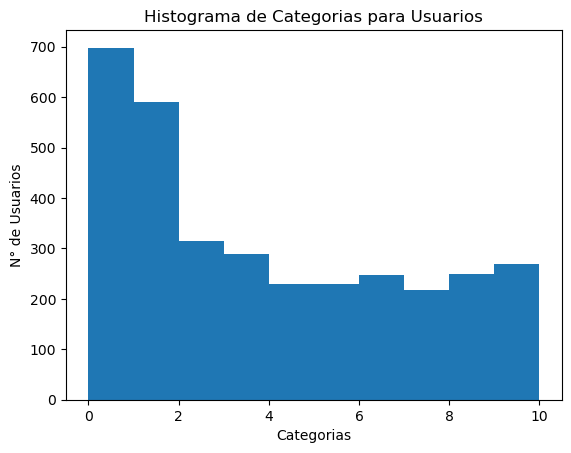

In [297]:
from sklearn.cluster import AgglomerativeClustering

clus = AgglomerativeClustering(n_clusters=11,linkage="ward").fit(subset_num)
mg = pd.Series(clus.labels_)

plt.hist(mg)
plt.title("Histograma de Categorias para Usuarios")
plt.xlabel("Categorias")
plt.ylabel("N° de Usuarios")